In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

%matplotlib inline

In [2]:
df = pd.read_csv('log_mini.csv')
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


## change the datatype

In [3]:
for colname in ['skip_1','skip_2','skip_3','not_skipped','hist_user_behavior_is_shuffle','premium']:
    df[colname] = df[colname].astype(int,copy=False)

In [4]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone


In [4]:
df.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                              int64
skip_2                              int64
skip_3                              int64
not_skipped                         int64
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle       int64
hour_of_day                         int64
date                               object
premium                             int64
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

##### true == 1 , false == 0

In [5]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium']

In [6]:
#for colname in col:
#    df[colname] = df[colname].astype(object,copy=False)

In [8]:
df.describe()

,session_position,session_length,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,60.000000,151.000000,23.000000


In [9]:
df.describe(include=['O'])

,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_is_shuffle,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
count,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880
unique,10000,50704,2,2,2,2,2,2,2,2,2,18,2,6,9,7
top,0_08fee456-e49e-468d-b1b3-fd8770e94978,t_bacf06d3-9185-4183-84ea-ff0db51475ce,0,1,1,0,0,1,0,0,0,2018-07-15,1,user_collection,fwdbtn,fwdbtn
freq,20,1427,97118,86824,108850,111996,161013,128865,143263,138865,116050,119639,136053,67430,79912,81389


## plot all categorical features

In [9]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium','context_type','hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end']

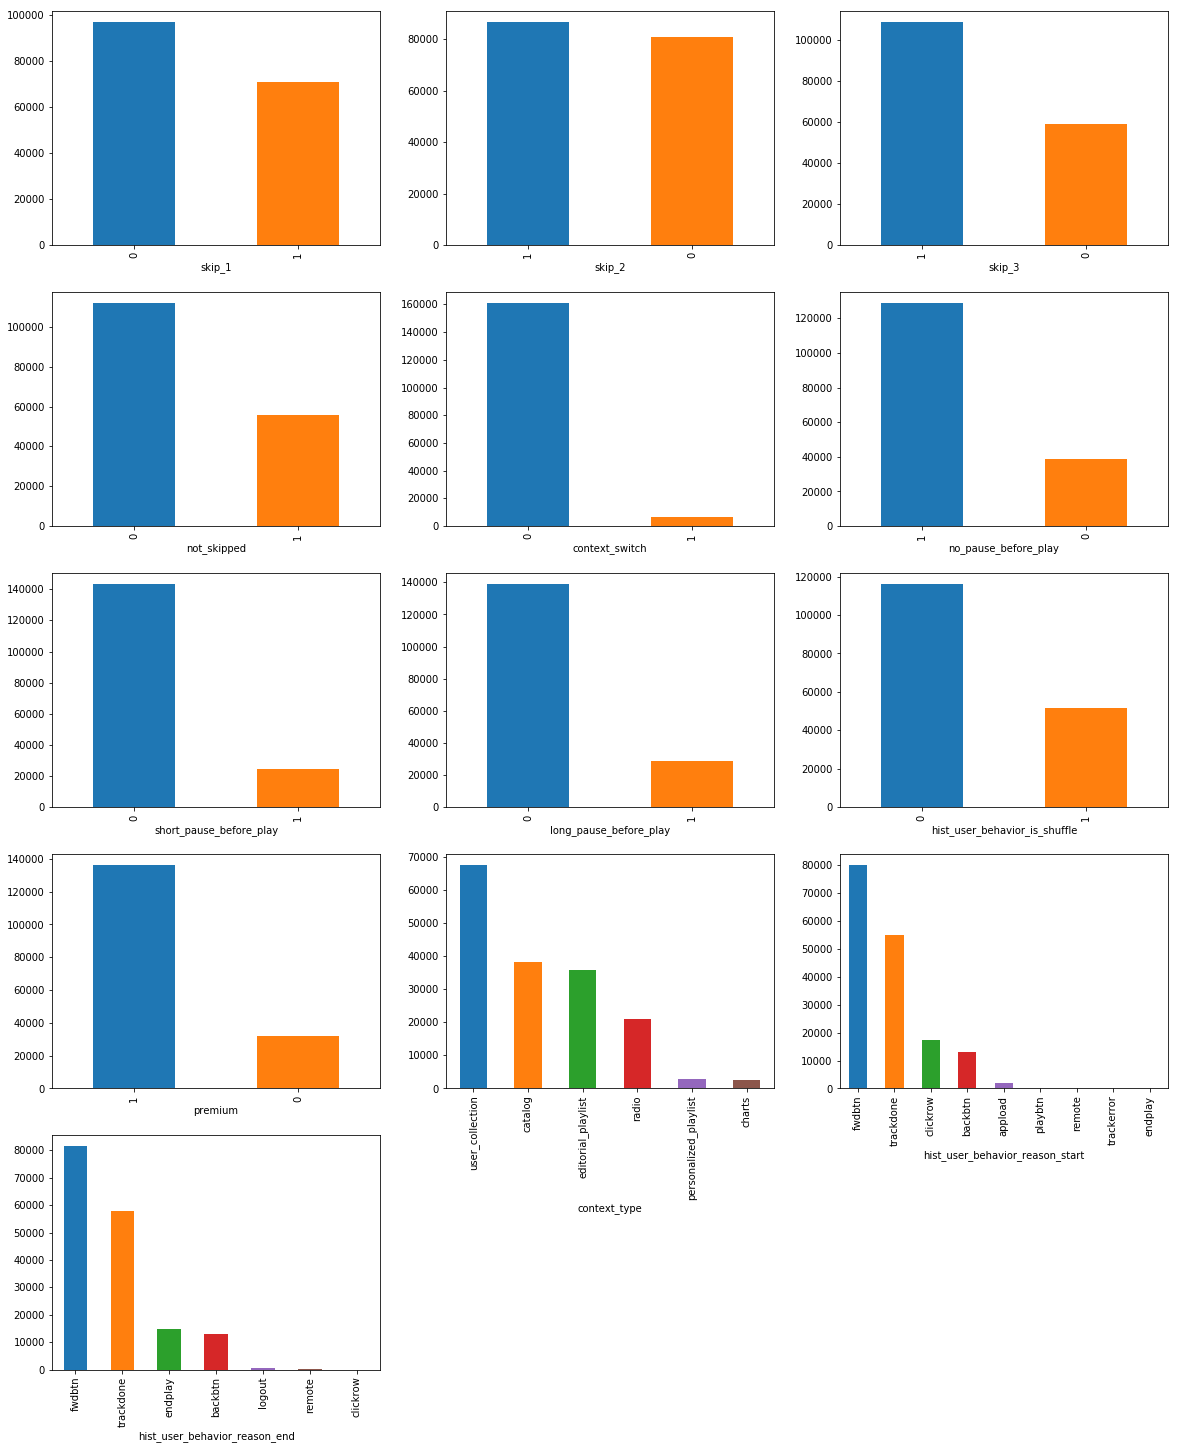

In [10]:
plt.figure(figsize=(20,25))
n = 1

for colname in col:
    plt.subplot(5,3,n)
    df[colname].value_counts().plot('bar')
    plt.xlabel(colname)
    n +=1    

## one-hot encoding

In [22]:
df_without_session_track = df.drop(['session_id', 'track_id_clean'], axis=1)

In [24]:
df_without_session_track.shape

(167880, 19)

In [25]:
df_without_session_track = pd.get_dummies(df_without_session_track)

In [26]:
df_without_session_track.shape

(167880, 65)

## correlation
not_skipped_1 means not skip

In [31]:
correlation = df_without_session_track.corr()

In [37]:
correlation['not_skipped_1'].sort_values()

not_skipped_0                               -1.000000
skip_3_1                                    -0.959225
skip_2_1                                    -0.731088
hist_user_behavior_reason_end_fwdbtn        -0.680506
skip_1_1                                    -0.602966
hist_user_behavior_reason_start_fwdbtn      -0.383116
hist_user_behavior_reason_end_endplay       -0.209849
hist_user_behavior_reason_end_backbtn       -0.203256
short_pause_before_play_1                   -0.126978
long_pause_before_play_1                    -0.092755
no_pause_before_play_0                      -0.080246
hist_user_behavior_reason_start_backbtn     -0.066307
session_length                              -0.059734
hist_user_behavior_n_seekfwd                -0.052323
hist_user_behavior_reason_end_logout        -0.039445
hist_user_behavior_reason_start_appload     -0.036226
context_switch_0                            -0.035617
hist_user_behavior_is_shuffle_1             -0.030787
context_type_user_collection

In [ ]:
# clf = XGBClassifier(n_estimators=i,
#                         n_jobs=-1, 
#                         random_state=0)
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X2_test)
#     score = clf.score(X_test,y_test)
#     print(i, "n_neighbors",round(score,4))
#     result.append(score)

# import more features about track

In [5]:
df_tf = pd.read_csv('tf_mini.csv')

In [6]:
set(df['track_id_clean'])-set(df_tf['track_id'])

set()

In [7]:
set(df_tf['track_id']) - set(df['track_id_clean'])

set()

In [8]:
df_tf = pd.get_dummies(df_tf, prefix=['mode'], columns=['mode'])

In [9]:
df_tf.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7',
       'mode_major', 'mode_minor'],
      dtype='object')

In [10]:
df_tf.shape

(50704, 31)

In [11]:
df.shape

(167880, 21)

In [12]:
df.rename(columns={'track_id_clean':'track_id'}, inplace=True)

In [13]:
df_all = pd.merge(df, df_tf, on=['track_id'],left_index=True,right_index=False, sort=True)

In [14]:
df_all.shape

(167880, 51)

In [15]:
df.shape

(167880, 21)

In [16]:
df_all.sort_values(axis=0, by=['session_id','session_position'], inplace=True)

In [17]:
df_all.reset_index(drop=True,inplace=True) 

In [49]:
df_not_premium =  df[df['premium']==0]

In [50]:
df_not_premium.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [51]:
df_not_premium[['session_position','date','hour_of_day','not_skipped']].head(10)

,session_position,date,hour_of_day,not_skipped
141,1,2018-07-14,21,1
142,2,2018-07-14,21,1
143,3,2018-07-14,21,1
144,4,2018-07-14,21,1
145,5,2018-07-14,21,1
146,6,2018-07-14,22,1
147,7,2018-07-14,22,1
148,8,2018-07-14,22,1
149,9,2018-07-14,22,0
150,10,2018-07-14,22,1


In [52]:
df.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id                           object
skip_1                              int64
skip_2                              int64
skip_3                              int64
not_skipped                         int64
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle       int64
hour_of_day                         int64
date                               object
premium                             int64
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [53]:
df_not_premium.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id                           object
skip_1                              int64
skip_2                              int64
skip_3                              int64
not_skipped                         int64
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle       int64
hour_of_day                         int64
date                               object
premium                             int64
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [54]:
check_repeat_0 = df_not_premium.groupby(['session_id']).mean()

In [55]:
skip = check_repeat_0['session_length'] - check_repeat_0['session_length']*check_repeat_0['not_skipped'] 
skip[skip > 6]

session_id
0_0009bdeb-b5b7-4073-9b01-b72a32c77cda    18.0
0_000a6cae-aef1-4a3e-b1bd-d1971edfcb41     8.0
0_000cec57-79f9-4acf-87a1-9bb9063d012d     7.0
0_000d307c-cfb4-4a65-9909-7b54d6b39cc8    18.0
0_000d5fd5-923d-451b-be5e-fd5961cff3ea     7.0
0_000fd7ed-3e38-4a30-8a4e-41abc122c83a    16.0
0_001179c0-5bf5-4008-ab47-b10258ecf9f7    10.0
0_0012dae0-48c3-4820-a719-1793f7a7f7ee     8.0
0_00130aaf-66be-4824-be3a-d41f8b8caafb    16.0
0_0014d04b-c05f-4e04-b677-9a1f5d182a6c    18.0
0_001544ae-d305-4178-9236-8181ced909f4    16.0
0_001bd376-06fa-4fab-bbfb-a496f88e1cee    18.0
0_001dfda4-9357-4136-9f56-4066f50e9d35    10.0
0_001e026a-72bc-4137-8859-3aa090ce6aa6    10.0
0_00202254-4b6b-45c2-9471-a5b26d5c751e    20.0
0_0020bfcc-989f-4b5c-8082-c1121ef078cb    11.0
0_0021e01f-aa7d-4746-a4d6-10ec3741ec1f    16.0
0_0025179d-081b-4e18-a0f7-d2cd879e27b2    16.0
0_00297b75-84de-4ea7-84df-bdd11e9fb665    18.0
0_002e17ff-3e6d-4e30-b8f0-ce9eb05f2e74     7.0
0_002e2503-200e-40f3-b1b6-0d74e4343ea2     7.0
0_

In [56]:
df_not_premium[df_not_premium['session_id']=='0_0009bdeb-b5b7-4073-9b01-b72a32c77cda'][['session_position','date','hour_of_day','skip_1','skip_2','skip_3','not_skipped','premium']]

,session_position,date,hour_of_day,skip_1,skip_2,skip_3,not_skipped,premium
536,1,2018-07-14,21,1,1,1,0,0
537,2,2018-07-14,21,1,1,1,0,0
538,3,2018-07-14,21,1,1,1,0,0
539,4,2018-07-14,21,0,0,1,0,0
540,5,2018-07-14,21,0,1,1,0,0
541,6,2018-07-14,21,1,1,1,0,0
542,7,2018-07-14,21,0,0,1,0,0
543,8,2018-07-14,21,0,0,0,1,0
544,9,2018-07-14,21,0,0,1,0,0
545,10,2018-07-14,21,1,1,1,0,0


In [37]:
df.head() # 0 false 1 true

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
